# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing the test dataset

In [5]:
testdf = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [6]:
testdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
traindf = pd.read_csv ('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [8]:
traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
traindf.shape

(8523, 12)

In [11]:
testdf.shape

(5681, 11)

### Since this is a big dataset, we must check for duplicates

In [14]:
traindf.duplicated().sum()

0

In [15]:
testdf.duplicated().sum()

0

# <font color = green>     EDA For Train dataset 

In [16]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
traindf.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7941,FDW09,13.65,Regular,0.043386,Snack Foods,80.2302,OUT010,1998,NaN,Tier 3,Grocery Store,79.2302
905,FDX16,17.85,LF,0.065810,Frozen Foods,149.1050,OUT046,1997,Small,Tier 1,Supermarket Type1,2247.0750
458,DRB48,NaN,Regular,0.024733,Soft Drinks,40.2822,OUT027,1985,Medium,Tier 3,Supermarket Type3,1296.3126


In [18]:
traindf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
testdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Check for Null Values

In [21]:
traindf.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
testdf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

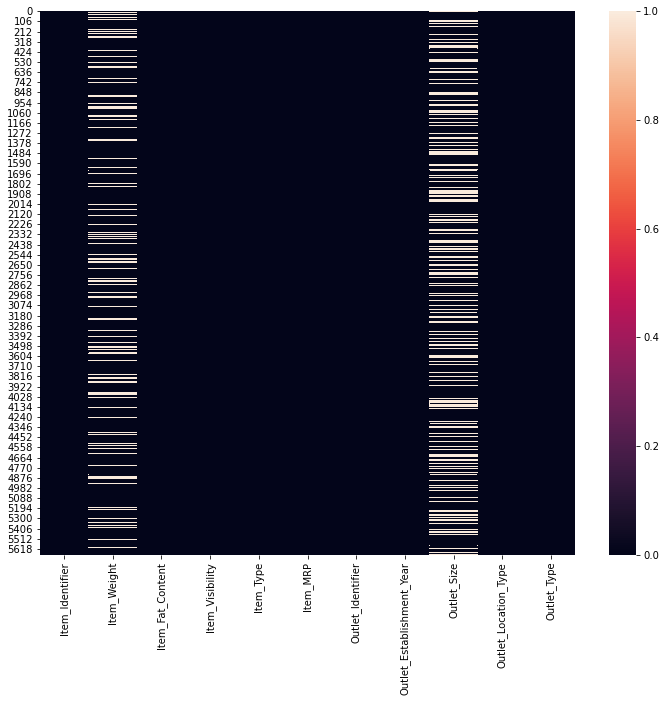

In [27]:
#using heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(testdf.isnull())

In [29]:
print("%Missing values: ", (testdf.isnull().sum().sort_values(ascending = False)/len(testdf))*100)

%Missing values:  Outlet_Size                  28.269671
Item_Weight                  17.180074
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


In [30]:
print("%Missing values: ", (traindf.isnull().sum().sort_values(ascending = False)/len(traindf))*100)

%Missing values:  Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


<AxesSubplot:>

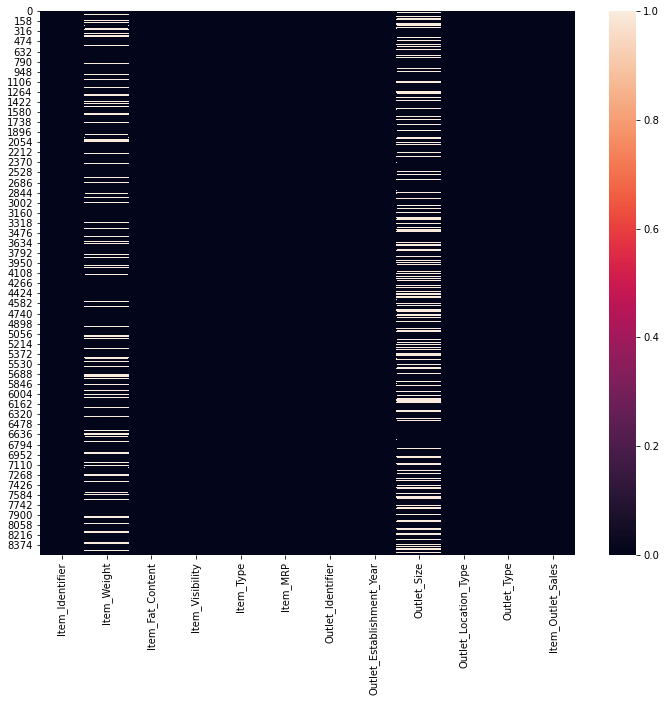

In [32]:
#Using heatmap

plt.figure(figsize=(12,10))
sns.heatmap(traindf.isnull())

# Finding Unique Values of all features

In [35]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [38]:
testdf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [34]:
traindf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Analysis of the categorical features

In [85]:
#Outlet wise revenue generation

In [49]:
traindf.pivot_table(values='Item_Outlet_Sales', index='Outlet_Identifier').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Outlet_Identifier,
OUT027,3694.038558
OUT035,2438.841866
OUT049,2348.354635
OUT017,2340.675263
OUT013,2298.995256
OUT046,2277.844267
OUT045,2192.384798
OUT018,1995.498739
OUT019,340.329723


In [44]:
traindf['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

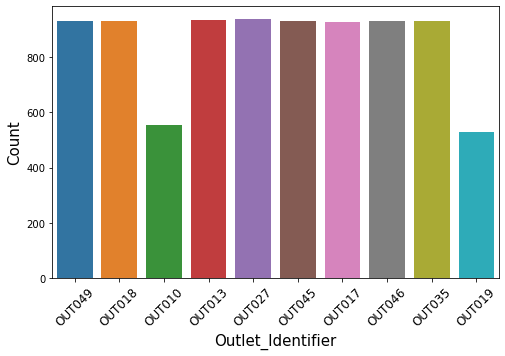

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(traindf['Outlet_Identifier'])
plt.xticks(fontsize = 12, rotation=45)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Outlet_Identifier', fontsize = 15)
plt.show()

In [86]:
#Revenue generation from fat content of item

In [50]:
traindf.pivot_table(values='Item_Outlet_Sales', index='Item_Fat_Content').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Item_Fat_Content,
Regular,2235.186702
Low Fat,2164.477336
low fat,2087.740737
LF,2073.551928
reg,1962.192268


In [51]:
traindf['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

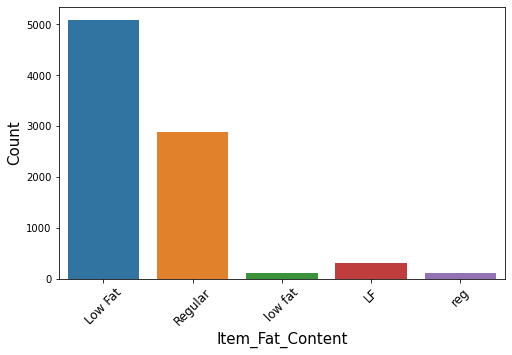

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(traindf['Item_Fat_Content'])
plt.xticks(fontsize = 12, rotation=45)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Item_Fat_Content', fontsize = 15)
plt.show()

In [87]:
#Revenue generation from different type of items

In [54]:
traindf.pivot_table(values='Item_Outlet_Sales', index='Item_Type').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Item_Type,
Starchy Foods,2374.332773
Seafood,2326.065928
Fruits and Vegetables,2289.009592
Snack Foods,2277.321739
Household,2258.784300
Dairy,2232.542597
Canned,2225.194904
Breads,2204.132226
Meat,2158.977911


In [56]:
traindaf['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

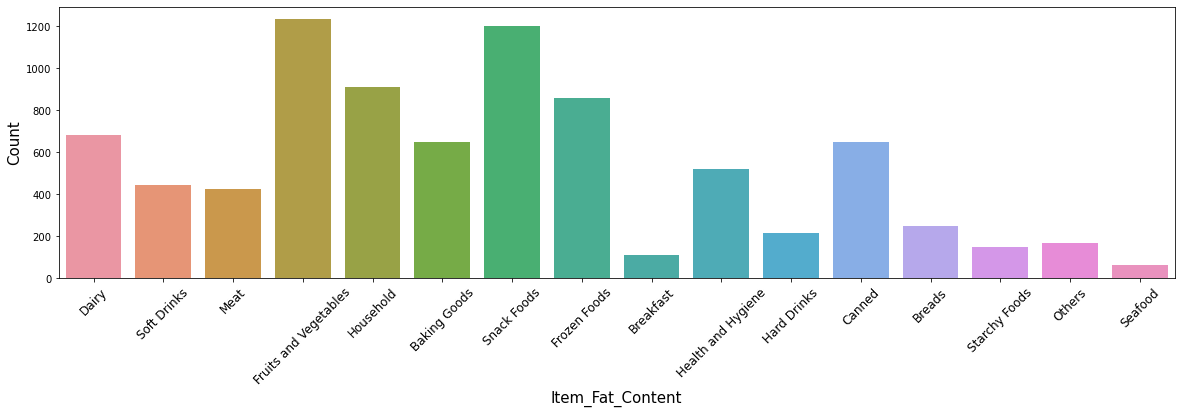

In [64]:
plt.figure(figsize=(20,5))
sns.countplot(traindf['Item_Type'])
plt.xticks(fontsize = 12, rotation=45)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Item_Fat_Content', fontsize = 15)
plt.show()

In [88]:
#Outlet establishment yeaer vs item outlet sales

In [65]:
traindf.pivot_table(values='Item_Outlet_Sales', index='Outlet_Establishment_Year').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2483.677474
2004,2438.841866
1999,2348.354635
2007,2340.675263
1987,2298.995256
1997,2277.844267
2002,2192.384798
2009,1995.498739
1998,339.351662


In [67]:
traindf['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

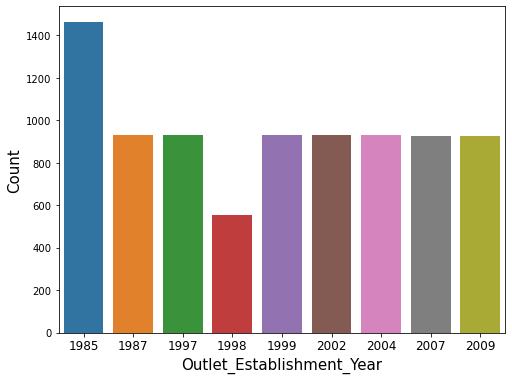

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(traindf['Outlet_Establishment_Year'])
plt.xticks(fontsize = 12)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Outlet_Establishment_Year', fontsize = 15)
plt.show()

In [89]:
#Revenue vs outlet size

In [69]:
traindf.pivot_table(values='Item_Outlet_Sales', index='Outlet_Size').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Outlet_Size,
Medium,2681.603542
High,2298.995256
Small,1912.149161


In [71]:
traindf['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

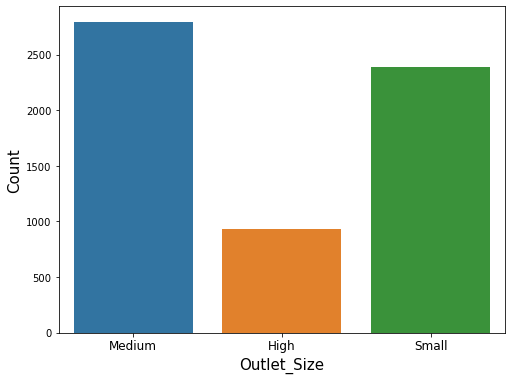

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(traindf['Outlet_Size'])
plt.xticks(fontsize = 12)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 15)
plt.show()

In [90]:
#Relation between outlet location & revenue

In [73]:
traindf.pivot_table(values='Item_Outlet_Sales', index='Outlet_Location_Type').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2323.990559
Tier 3,2279.627651
Tier 1,1876.909159


In [75]:
traindf['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

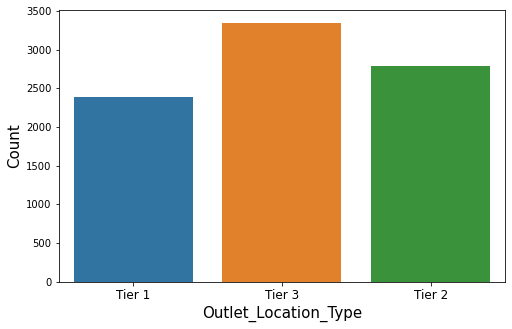

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(traindf['Outlet_Location_Type'])
plt.xticks(fontsize = 12)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Outlet_Location_Type', fontsize = 15)
plt.show()

In [77]:
#Checking for Revenue from different type of items sold by every outlet

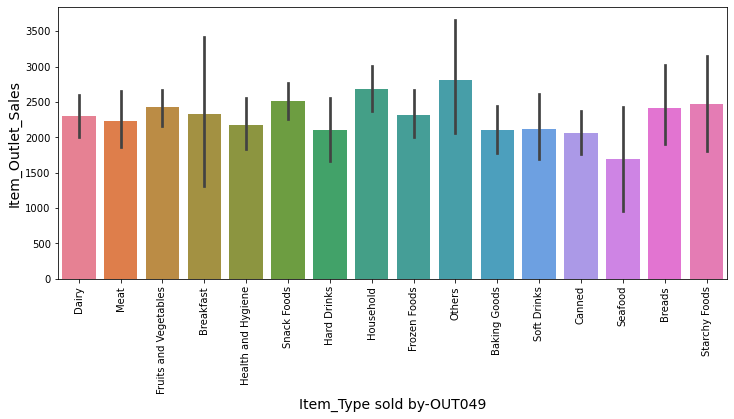

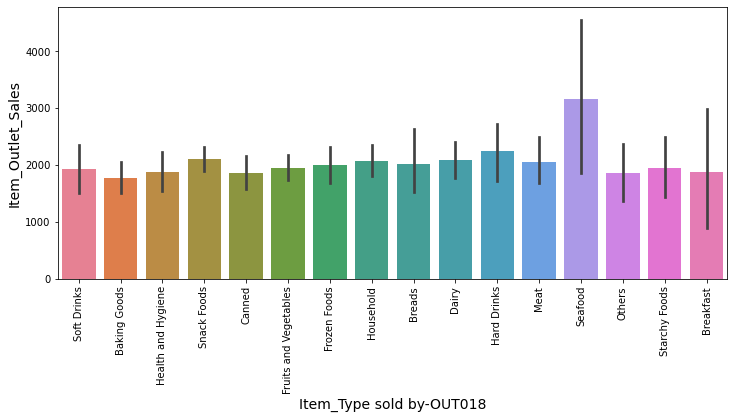

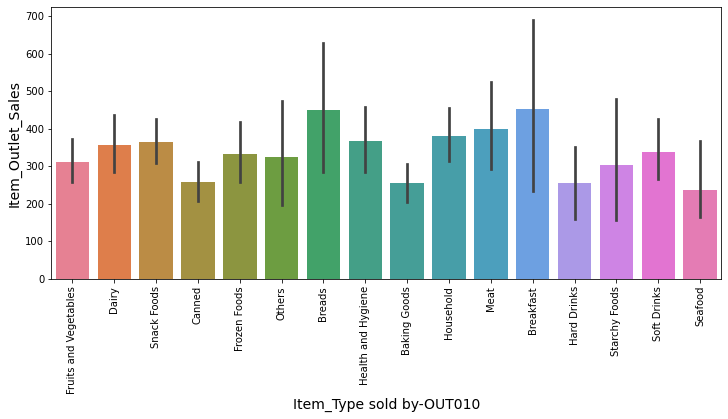

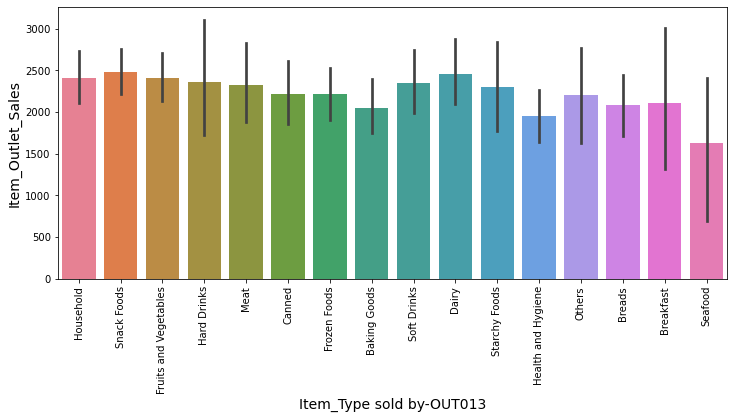

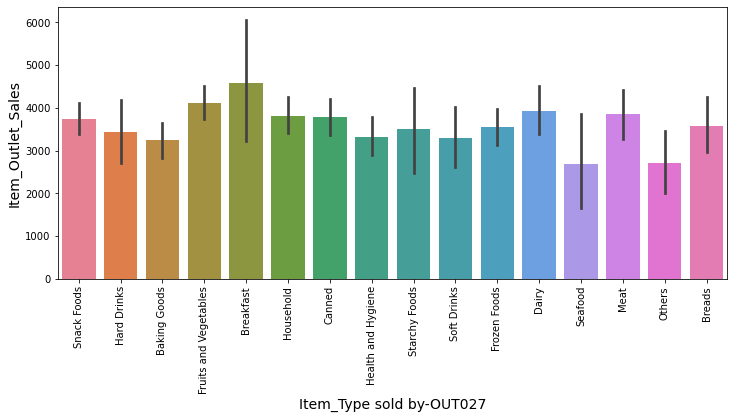

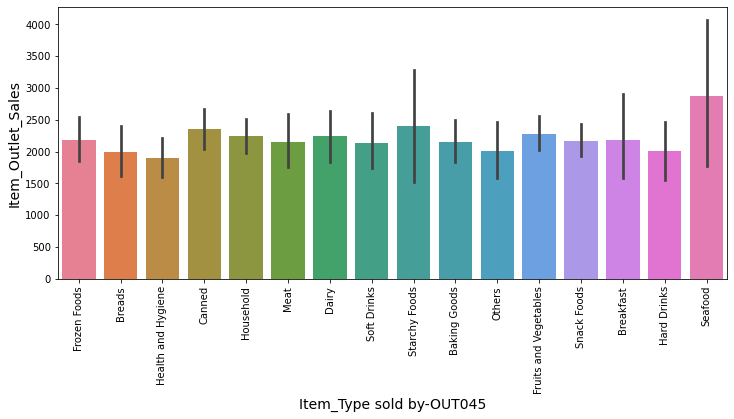

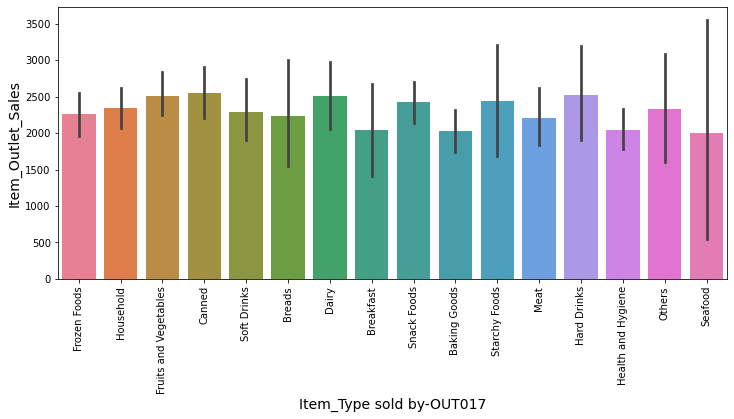

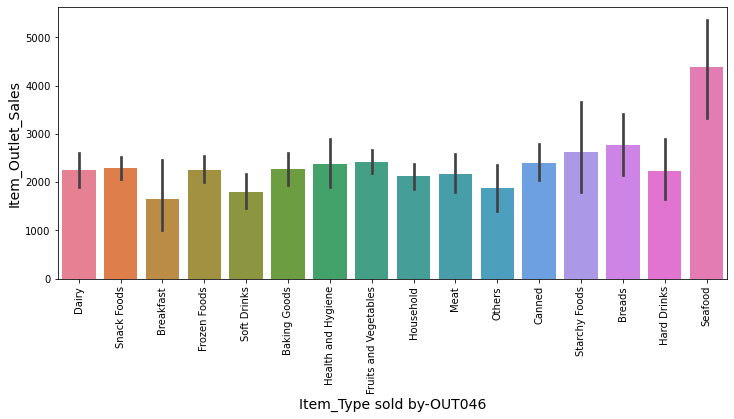

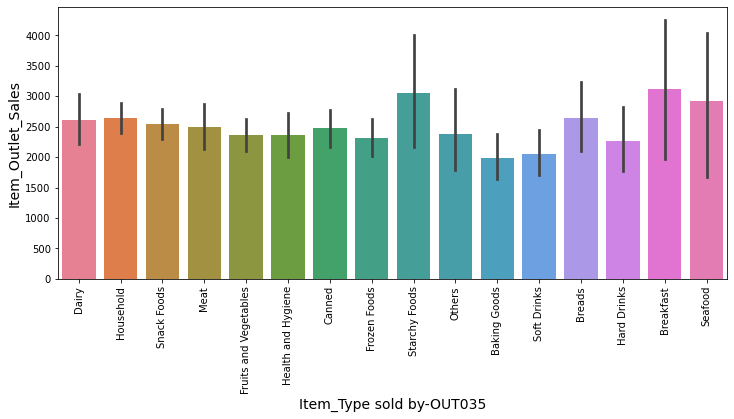

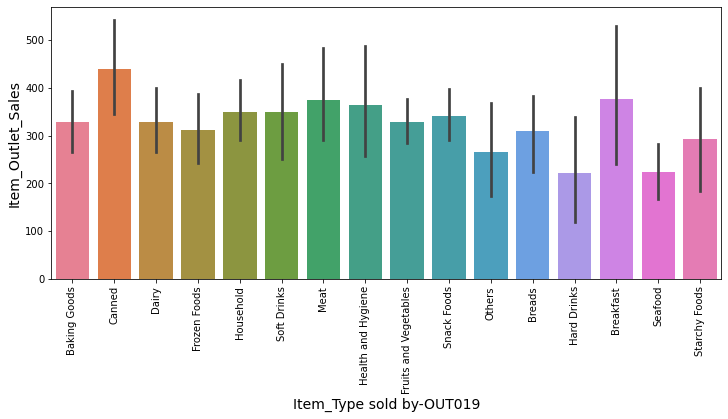

In [78]:
for i in traindf['Outlet_Identifier'].unique().tolist():
    plt.figure(figsize=(12,5))
#     sns.countplot(train0[train0['Outlet_Identifier'] == i]['Item_Type'])
    sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=traindf[traindf['Outlet_Identifier'] == i], palette="husl");
    plt.xticks(fontsize = 10, rotation=90)
    plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
    plt.xlabel(xlabel = 'Item_Type sold by-' + i, fontsize = 14)
    plt.show()

In [84]:
#Relation between outlet type and outlet location

Text(0, 0.5, 'Item_Outlet_Sales')

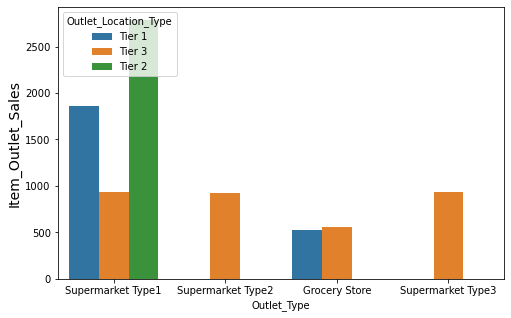

In [91]:
plt.figure(figsize=(8,5))
ax = sns.countplot('Outlet_Type',hue='Outlet_Location_Type',data=traindf)
plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)

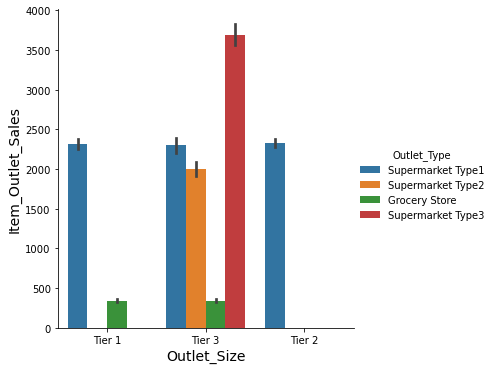

In [93]:
sns.catplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", hue ='Outlet_Type',  data=traindf, kind="bar")
plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

# Analysis of the Numerical features

In [94]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [96]:
traindf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [97]:
#Excluding the establshment year and creating a new dataframe for numerical analysis

traindf_n = traindf.drop('Outlet_Establishment_Year', axis = 1).select_dtypes(np.number)

In [98]:
traindf_n.sample(3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
3315,NaN,0.000000,100.1384,2956.1520
2742,NaN,0.016956,109.3228,2431.5016
7512,7.55,0.030939,121.0072,2082.6224


# Checking for data distribution

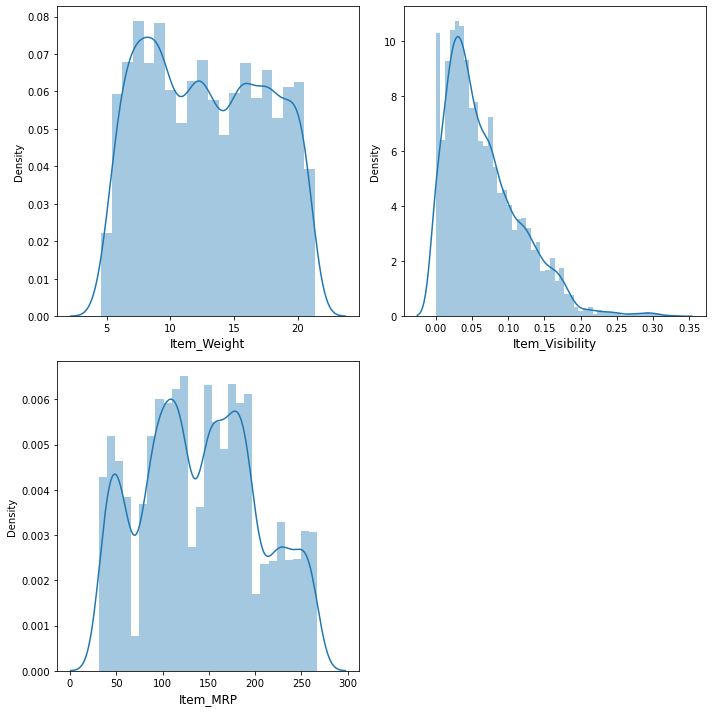

In [101]:
j=0
plt.figure(figsize=(10,10))
for column in traindf_n.drop('Item_Outlet_Sales', axis = 1).columns:
    plt.subplot(2,2,j+1)
    sns.distplot(traindf_n[column])
    plt.xlabel(column,fontsize=12)
    j+=1
    
plt.tight_layout()

# Checking for Outliers

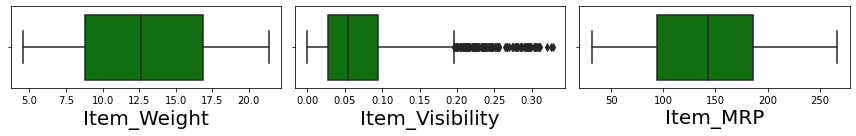

In [104]:
plt.figure(figsize=(12,2), facecolor='white')
plotnumber =1
for column in traindf_n.drop('Item_Outlet_Sales', axis = 1).columns:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(traindf_n[column], color='g
                    ')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Checking for skewness

In [106]:
traindf_n.skew().abs().sort_values()

Item_Weight          0.082426
Item_MRP             0.127202
Item_Visibility      1.167091
Item_Outlet_Sales    1.177531
dtype: float64

# Distribution using pairplot

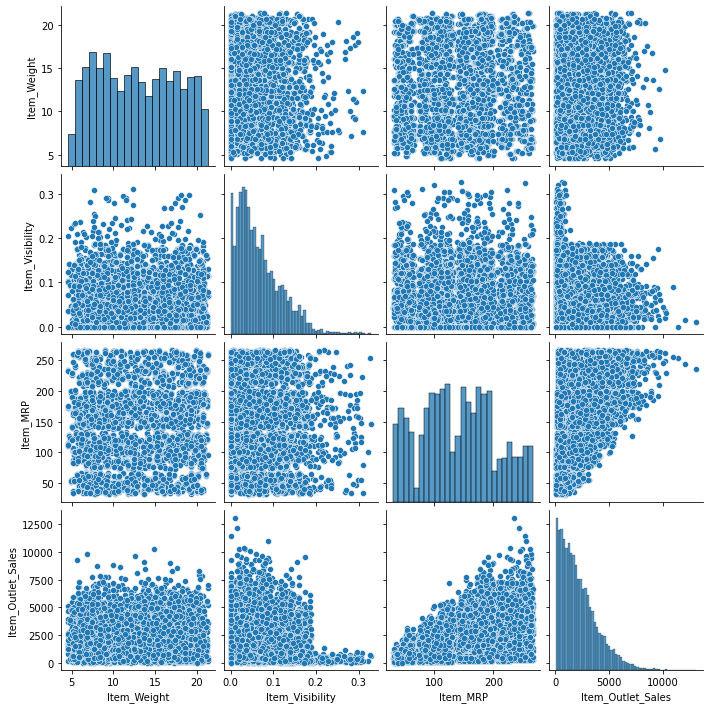

In [109]:
sns.pairplot(traindf_n)

# Checking for Co-Relation

In [112]:
traindf_n.corr().abs()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,0.014048,0.027141,0.014123
Item_Visibility,0.014048,1.000000,0.001315,0.128625
Item_MRP,0.027141,0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,0.128625,0.567574,1.000000


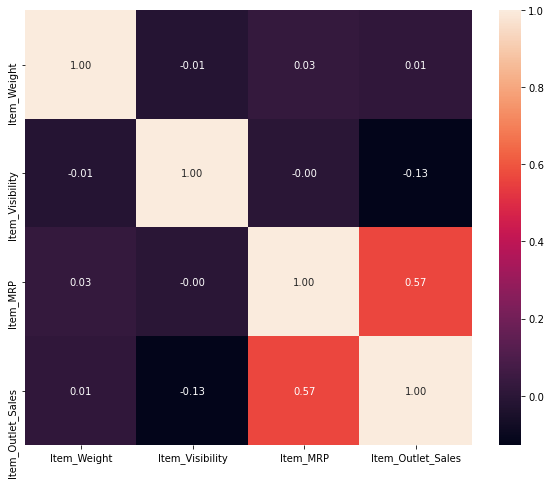

In [113]:
#Using heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(traindf_n.corr(),annot=True, fmt = ".2f")
plt.show()

In [114]:
# Converting Establishment year to string value
traindf['Outlet_Establishment_Year'] = traindf['Outlet_Establishment_Year'].astype(str)
testdf['Outlet_Establishment_Year'] = testdf['Outlet_Establishment_Year'].astype(str)

In [116]:
## Filling missing values in Outlet-Size Column based on the outlet type.

from scipy.stats import mode
#Determing the mode for each
outlet_size_mode_train = traindf.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
outlet_size_mode_test = testdf.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

miss_train = traindf['Outlet_Size'].isnull() 
traindf.loc[miss_train,'Outlet_Size'] = traindf.loc[miss_train,'Outlet_Type'].apply(lambda x: outlet_size_mode_train[x])

miss_test = testdf['Outlet_Size'].isnull() 
testdf.loc[miss_test,'Outlet_Size'] = testdf.loc[miss_test,'Outlet_Type'].apply(lambda x: outlet_size_mode_test[x])

print(sum(traindf['Outlet_Size'].isnull()))
print(sum(testdf['Outlet_Size'].isnull()))

0
0


In [118]:
traindf['Item_Weight'] = ( traindf['Item_Weight'].fillna (traindf['Item_Weight'].mean())) #for train data
testdf['Item_Weight'] = ( testdf['Item_Weight'].fillna (testdf['Item_Weight'].mean())) #for test data

print(traindf['Item_Weight'].isnull().sum())
print(testdf['Item_Weight'].isnull().sum())

0
0


# Removing Skewness & Outliers

In [119]:
out_skew_train = traindf.select_dtypes(np.number)
out_skew_test = testdf.select_dtypes(np.number)

In [120]:
# creating a function to remove outliers using standard deviation method...
def get_outliers_std(data):
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
        data_mean, data_std = np.mean(data[column]), np.std(data[column])
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove #returns list of indices to remove outliers

In [121]:
to_remove_train = get_outliers_std(out_skew_train)
to_remove_test = get_outliers_std(out_skew_test)

In [ ]:
traindf = traindf.drop(traindf.index[to_remove_train])
testdf = testdf.drop(testdf.index[to_remove_test])

# Removing Skewness

In [124]:
from scipy.stats import yeojohnson

In [ ]:
traindf['Item_Vis_yeo'] = pd.Series(yeojohnson(traindf['Item_Visibility'])[0])
testdf['Item_Vis_yeo'] = pd.Series(yeojohnson(testdf['Item_Visibility'])[0])


traindf = traindf.drop('Item_Visibility', axis=1)
testdf = testdf.drop('Item_Visibility', axis=1)

In [128]:
traindf.skew().abs()

Item_Weight                  0.089291
Item_MRP                     0.138990
Outlet_Establishment_Year    0.423379
Item_Outlet_Sales            0.878267
Item_Vis_yeo                 0.112790
dtype: float64

In [129]:
testdf.skew().abs()

Item_Weight                  0.140901
Item_MRP                     0.133061
Outlet_Establishment_Year    0.411451
Item_Vis_yeo                 0.105458
dtype: float64

# Chekcking for multicolinearity

In [133]:
traindf.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Vis_yeo
1714,FDA20,6.780,Low Fat,Fruits and Vegetables,187.7240,OUT049,1999,Medium,Tier 1,Supermarket Type1,1491.3920,0.030827
5176,FDM13,6.425,Low Fat,Breakfast,133.0626,OUT017,2007,Small,Tier 2,Supermarket Type1,1442.7886,0.005390
7661,NCX54,9.195,Low Fat,Household,105.6622,OUT035,2004,Small,Tier 2,Supermarket Type1,1693.7952,0.037018
5057,NCJ19,18.600,Low Fat,Others,55.6588,OUT010,1998,Small,Tier 3,Grocery Store,114.5176,-0.000000
612,NCQ41,14.800,Low Fat,Health and Hygiene,196.3794,OUT013,1987,High,Tier 3,Supermarket Type1,1950.7940,0.049381


In [135]:
testdf.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Vis_yeo
1125,NCS18,12.695633,Low Fat,Household,108.0938,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.037238
5294,NCS29,9.000000,Low Fat,Health and Hygiene,264.6884,OUT045,2002,Small,Tier 2,Supermarket Type1,0.032228
3293,DRL60,12.695633,LF,Soft Drinks,151.6682,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.055681
4378,FDB60,12.695633,Low Fat,Baking Goods,193.3136,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.023858
4368,FDD40,20.250000,Regular,Dairy,192.8162,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.089055


In [136]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8338 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8338 non-null   object 
 1   Item_Weight                8338 non-null   float64
 2   Item_Fat_Content           8338 non-null   object 
 3   Item_Type                  8338 non-null   object 
 4   Item_MRP                   8338 non-null   float64
 5   Outlet_Identifier          8338 non-null   object 
 6   Outlet_Establishment_Year  8338 non-null   object 
 7   Outlet_Size                8338 non-null   object 
 8   Outlet_Location_Type       8338 non-null   object 
 9   Outlet_Type                8338 non-null   object 
 10  Item_Outlet_Sales          8338 non-null   float64
 11  Item_Vis_yeo               8156 non-null   float64
dtypes: float64(4), object(8)
memory usage: 846.8+ KB


In [138]:
traindf.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Item_Vis_yeo                 182
dtype: int64

In [139]:
traindf['Item_Vis_yeo']=traindf['Item_Vis_yeo'].replace(0,np.nan)
testdf['Item_Vis_yeo']=testdf['Item_Vis_yeo'].replace(0,np.nan)

traindf['Item_Vis_yeo'].fillna(traindf['Item_Vis_yeo'].median(),inplace=True)
testdf['Item_Vis_yeo'].fillna(testdf['Item_Vis_yeo'].median(),inplace=True)

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
df = traindf.drop('Item_Outlet_Sales', axis=True).select_dtypes(np.number)

vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,5.519751,Item_Weight
1,4.575803,Item_MRP
2,4.096693,Item_Vis_yeo


In [141]:
#All Numerical values are within 10 VIF. hence no multicollinearity.

# Encoding Categorical Features

In [143]:
# Encoding Item_Identifier_type

In [142]:
traindf['Item_Identifier_type']= traindf['Item_Identifier'].apply(lambda x: x[0:2])
testdf['Item_Identifier_type']= testdf['Item_Identifier'].apply(lambda x: x[0:2])

In [144]:
# Encoding Item_Fat_Content

In [145]:
traindf['Item_Fat_Content']=traindf['Item_Fat_Content'].replace('LF','Low Fat')
traindf['Item_Fat_Content']=traindf['Item_Fat_Content'].replace('low fat','Low Fat')
traindf['Item_Fat_Content']=traindf['Item_Fat_Content'].replace('reg','Regular')


testdf['Item_Fat_Content']=testdf['Item_Fat_Content'].replace('LF','Low Fat')
testdf['Item_Fat_Content']=testdf['Item_Fat_Content'].replace('low fat','Low Fat')
testdf['Item_Fat_Content']=testdf['Item_Fat_Content'].replace('reg','Regular')

In [146]:
#Encoding Outlet_Size

In [147]:
outlet_size_dict = {'Small': 1, 'High': 2, 'Medium': 3}

traindf['Outlet_Size'] = traindf['Outlet_Size'].map(outlet_size_dict)
testdf['Outlet_Size'] = testdf['Outlet_Size'].map(outlet_size_dict)

In [148]:
#Encoding Outlet_Location_Type

In [149]:
outlet_loc_dict = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}

traindf['Outlet_Location_Type'] = traindf['Outlet_Location_Type'].map(outlet_loc_dict)
testdf['Outlet_Location_Type'] = testdf['Outlet_Location_Type'].map(outlet_loc_dict)

In [150]:
#Encoding outlet_type

In [151]:
outlet_type_dict = {'Grocery Store': 1, 'Supermarket Type2': 2, 'Supermarket Type1': 3, 'Supermarket Type3':4}


traindf['Outlet_Type'] = traindf['Outlet_Type'].map(outlet_type_dict)
testdf['Outlet_Type'] = testdf['Outlet_Type'].map(outlet_type_dict)

In [152]:
#Dropping Item_Identifier feature

traindf.drop('Item_Identifier', axis=1, inplace=True)
testdf.drop('Item_Identifier', axis=1, inplace=True)

In [153]:
traindf.sample(5)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Vis_yeo,Item_Identifier_type
6474,17.250000,Regular,Fruits and Vegetables,63.4194,OUT035,2004,1,2,3,1547.9850,0.044709,FD
4148,12.857645,Low Fat,Snack Foods,64.5510,OUT027,1985,3,3,4,1201.7690,0.008243,FD
4303,5.655000,Low Fat,Soft Drinks,147.5102,OUT046,1997,1,1,3,1166.4816,0.080205,DR
1053,10.195000,Low Fat,Snack Foods,146.5076,OUT018,2009,3,3,2,1330.2684,0.054959,FD
5613,20.600000,Regular,Fruits and Vegetables,185.7556,OUT046,1997,1,1,3,3942.8676,0.015597,FD


In [154]:
testdf.sample(5)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Vis_yeo,Item_Identifier_type
2063,13.300,Regular,Fruits and Vegetables,61.0536,OUT046,1997,1,1,3,0.044862,FD
4024,6.235,Low Fat,Household,260.9962,OUT017,2007,1,2,3,0.079244,NC
3202,10.000,Regular,Snack Foods,129.2994,OUT049,1999,3,1,3,0.080280,FD
5300,19.350,Low Fat,Health and Hygiene,63.8168,OUT017,2007,1,2,3,0.045760,NC
2538,8.895,Low Fat,Hard Drinks,234.8616,OUT049,1999,3,1,3,0.035957,DR


In [155]:
traindf = pd.get_dummies(traindf, drop_first = True)
testdf = pd.get_dummies(testdf, drop_first = True)

# Scaling the Data

In [162]:
X=traindf.drop(columns =['Item_Outlet_Sales'])
Y=traindf['Item_Outlet_Sales']

In [157]:
test_data = testdf.copy()

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


X_train_scaled = scaler.fit_transform(x)
test_data_scaled = scaler.fit_transform(test_data)

# Building Models

In [159]:
from scipy.stats import zscore, boxcox
import statsmodels.formula.api as smf
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [171]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
xgb = XGBRegressor()

model = [lr, ls, rd, rfr, abr, gbr, dt, svr, knn, xgb]

In [170]:
for i in range (100,151):
    x_train, x_test, y_train, y_test = train_test_split (X_train_scaled, Y, test_size = 0.2, random_state = i)
    lr.fit (x_train, y_train)
    pred_train = lr.predict (x_train)
    pred_test = lr.predict (x_test)
    print (f"At random state {i}, the training accuracy is: {r2_score (y_train, pred_train)}")
    print (f"At random state {i}, the testing accuracy is: {r2_score (y_test, pred_test)}")
    print (f"The difference in accuracy at {i} is: {(r2_score (y_train, pred_train)) - (r2_score (y_test, pred_test))}")
                                                                                       
    print ('\n')
 

At random state 100, the training accuracy is: 0.5603499730788801
At random state 100, the testing accuracy is: 0.5482429008732073
The difference in accuracy at 100 is: 0.012107072205672864


At random state 101, the training accuracy is: 0.560361677614877
At random state 101, the testing accuracy is: 0.5451427503084285
The difference in accuracy at 101 is: 0.015218927306448471


At random state 102, the training accuracy is: 0.5646878689536904
At random state 102, the testing accuracy is: 0.5270888810035738
The difference in accuracy at 102 is: 0.037598987950116625


At random state 103, the training accuracy is: 0.5598056406538319
At random state 103, the testing accuracy is: 0.5479897063669932
The difference in accuracy at 103 is: 0.011815934286838692


At random state 104, the training accuracy is: 0.5607164762047804
At random state 104, the testing accuracy is: 0.5401726562373953
The difference in accuracy at 104 is: 0.02054381996738508


At random state 105, the training accuracy

*************************LinearRegression()*************************
The training score is:  55.722690502430126
The testing score is:  55.752095267976244
The R2 score is:  55.752095267976244
The MAE is:  788.4403016643836
The MSE is:  1036.2920528815023
The CV score is:  55.31671349668198
Difference between R2 score and CV score is:  0.43538177129426714


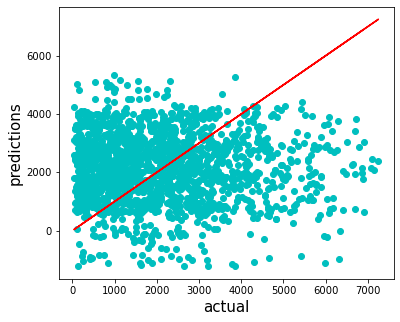

----------------------------------------------------


*************************Lasso()*************************
The training score is:  55.82529256221148
The testing score is:  55.80805119565948
The R2 score is:  55.80805119565948
The MAE is:  788.4990082063089
The MSE is:  1035.6365978083106
The CV score is:  55.44916808904803
Difference between R2 score and CV score is:  0.35888310661145084


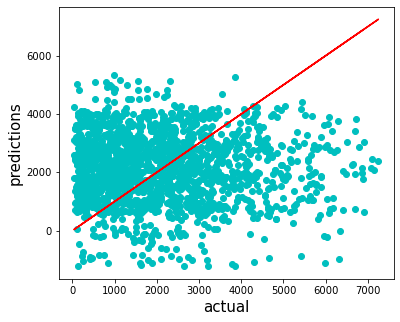

----------------------------------------------------


*************************Ridge()*************************
The training score is:  55.829196395258606
The testing score is:  55.76859141232144
The R2 score is:  55.76859141232144
The MAE is:  788.8548805694605
The MSE is:  1036.0988638821925
The CV score is:  55.32484192141901
Difference between R2 score and CV score is:  0.44374949090243376


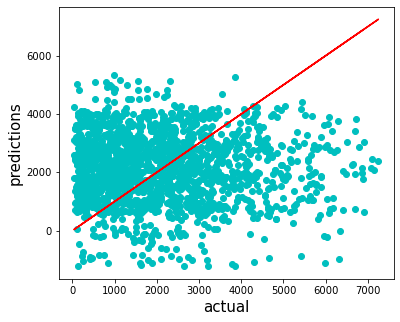

----------------------------------------------------


*************************RandomForestRegressor()*************************
The training score is:  93.66551227461596
The testing score is:  53.493146362046474
The R2 score is:  53.493146362046474
The MAE is:  759.1664073225421
The MSE is:  1062.4152399944414
The CV score is:  54.74800586057032
Difference between R2 score and CV score is:  -1.266108010790731


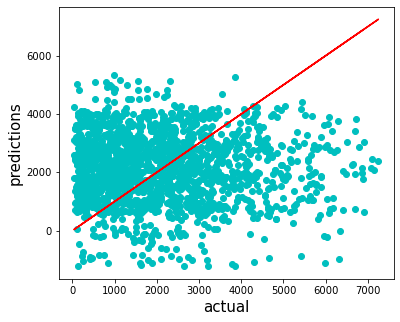

----------------------------------------------------


*************************AdaBoostRegressor()*************************
The training score is:  55.93481913562761
The testing score is:  55.80507406227251
The R2 score is:  55.80507406227251
The MAE is:  781.8550952852605
The MSE is:  1035.6714817232473
The CV score is:  55.118052483367364
Difference between R2 score and CV score is:  0.6394646104313182


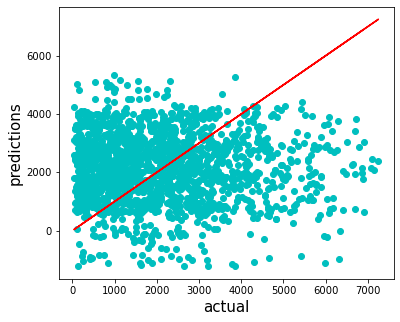

----------------------------------------------------


*************************GradientBoostingRegressor()*************************
The training score is:  62.281923330929864
The testing score is:  58.800151192064966
The R2 score is:  58.800151192064966
The MAE is:  723.7889493906259
The MSE is:  999.9622926435985
The CV score is:  58.212504538472864
Difference between R2 score and CV score is:  0.568214509797194


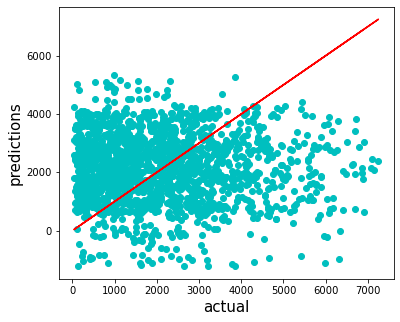

----------------------------------------------------


*************************DecisionTreeRegressor()*************************
The training score is:  100.0
The testing score is:  18.472481719427748
The R2 score is:  18.472481719427748
The MAE is:  1000.5457189448442
The MSE is:  1406.6560670078986
The CV score is:  13.500573070459707
Difference between R2 score and CV score is:  3.8719002715798023


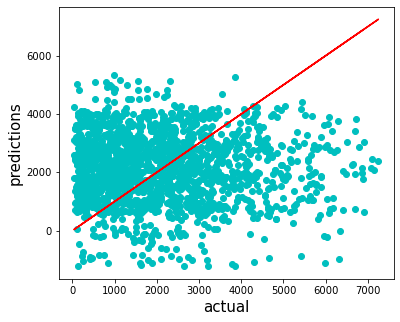

----------------------------------------------------


*************************SVR()*************************
The training score is:  0.29718970559652336
The testing score is:  0.9802966849627448
The R2 score is:  0.9802966849627448
The MAE is:  1203.3644737933478
The MSE is:  1550.231733858702
The CV score is:  19.907719779656706
Difference between R2 score and CV score is:  -18.92742309469396


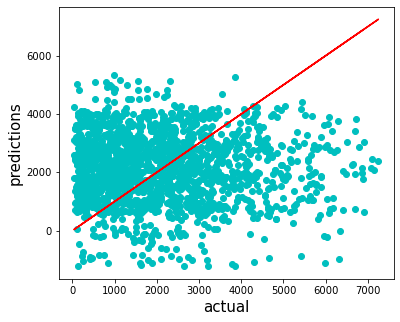

----------------------------------------------------


*************************KNeighborsRegressor()*************************
The training score is:  63.15900978275809
The testing score is:  47.23675465103858
The R2 score is:  47.23675465103858
The MAE is:  838.0158758992806
The MSE is:  1131.6224703113876
The CV score is:  45.70976120730562
Difference between R2 score and CV score is:  1.5269934437329624


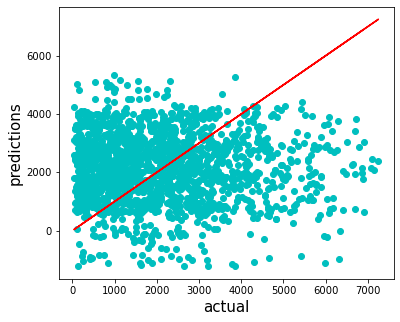

----------------------------------------------------


*************************XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)*************************
The training score is:  84.82884264505532
The testing score is:  52.38075577802621
The R2 score is:  52.38075577802621
The MAE is:  772.9584283236428
The MSE is:  1075.046034624499
The CV score is:  52.51188305400204
Difference between R2 score and CV score is:  -0.13112727597582818


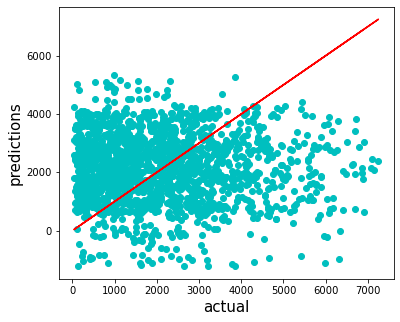

----------------------------------------------------




In [192]:
for m in model:
    x_train, x_test, y_train, y_test = train_test_split (X_train_scaled, Y, test_size = 0.2, random_state = 131)
        
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    
    
    
    print(f'*************************{m}*************************')    
    print ("The training score is: ", (m.score(x_train, y_train))*100) # Training Score
    print ("The testing score is: ", (m.score(x_test, y_test)*100)) # Training Score


    print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
    print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
    print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE
    
    print ("The CV score is: ",(cross_val_score(m, x, y, cv=5).mean())*100) #Cross Validation Score with CV=5
    print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(m,x,y, cv=5).mean())*100)))

     
        
    ##plotting the graph with bestfit line, actual & predicted values
    plt.figure(figsize = (6,5))
    plt.scatter(x = y_test, y=pred_test, color = 'c')
    plt.plot(y_test, y_test, color = 'r')
    plt.xlabel('actual', fontsize = 15)
    plt.ylabel('predictions', fontsize = 15)
    
    plt.show()
    
    
    print ("----------------------------------------------------")
    print ('\n')


### Conclusion - Selecting GBR (Gradient Boosting Regressor) because:
    1. It has lowest MAE
    2. It has least difference between R2 score & CV score

# Hyper Parameter Tuning

In [193]:
gbr.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [194]:
from sklearn.model_selection import GridSearchCV

In [200]:
leaf_size = list(range(1,50))#Considering the CPU capacity of my laptop
n_estimator =[100,500,1000]

In [201]:
hyperparameters = dict(leaf_size=leaf_size, n_estimator=n_estimator)#Converting to dict

In [214]:
gbr2=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=gbr2,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs =1)

In [215]:
search.fit(X,y)
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

# Tuning The GBR models as per the best parameter

*************************GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)*************************
The training score is:  60.70398694441366
The testing score is:  59.36055418750642
The R2 score is:  59.36055418750642
The MAE is:  722.6016280979401
The MSE is:  993.1382321295366
The CV score is:  52.51188305400204
Difference between R2 score and CV score is:  6.848671133504382


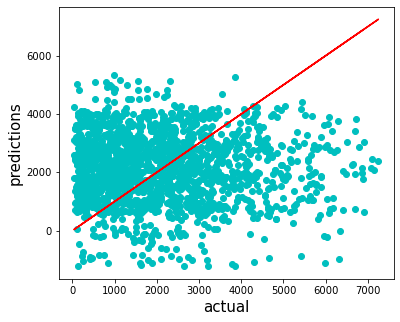

----------------------------------------------------




In [216]:
gbr_tuned = GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 500)
gbr_tuned.fit(x_train, y_train)
y_pred = gbr_tuned.predict(x_test)
    
    
    
print(f'*************************{gbr_tuned}*************************')    
print ("The training score is: ", (gbr_tuned.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ", (gbr_tuned.score(x_test, y_test)*100)) # Training Score


print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE
    
print ("The CV score is: ",(cross_val_score(m, x, y, cv=5).mean())*100) #Cross Validation Score with CV=5
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(m,x,y, cv=5).mean())*100)))

     
        
##plotting the graph with bestfit line, actual & predicted values
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'c')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
    
plt.show()
    
    
print ("----------------------------------------------------")
print ('\n')


#### Since we tuned only a few parameters in gbr, the result is almost identical to un-tuned model only.

# Saving the model

In [217]:
import pickle

In [218]:
pickle.dump(gbr, open('BigDataMart','wb'))

# Prediction on provided data

In [220]:
gbr_model =pickle.load(open('BigDataMart','rb'))
y_pred =gbr_model.predict(test_data_scaled)
y_pred

array([1475.08254157, 1376.33675724,  694.25167768, ..., 1742.17983589,
       3581.32676684, 1305.68310987])

# <font color = cyan>  Thank You